# Prerequesites

In [1]:
import plotly.graph_objects as go
import numpy as np

from pre_processing import create_df
from Classfile import *

import os
from datetime import date

In [3]:
main = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Isochrone_Archive/Coding/"
#main = "C:/Users/alena/OneDrive/Work/PhD/Isochrone_Archive/Coding/"
subdir = date.today()
output_path = os.path.join(main, str(subdir))
try:
    os.mkdir(output_path)
except FileExistsError:
    pass
output_path = output_path + "/"

# Hyperparameter path
hypers = os.path.join(output_path, "hyperparams")
try:
    os.mkdir(hypers)
except FileExistsError:
    pass
hypers = hypers + "/"

### Catalog 1

In [6]:
CI_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data/all_ages/CatalogI_BCD_ages.csv"


CI_cols = ["Cluster", "Plx", "e_Plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP", "BP-G",
           "G-RP",
           "logA_B", "AV_B", "AgeNN_CG", "AVNN_CG", "logage_D", "Av_D",
           "RUWE", "Proba", "X", "Y", "Z", "N"]

CI_names = ["Cluster_id", "plx", "e_plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP", "BP-G",
            "G-RP",
            "age_B", "av_B", "age_C", "av_C", "age_D", "av_D", "ruwe", "probability", "x", "y", "z", "Nstars"]

q_filter = {"parameter": ["ruwe", "plx", "probability"], "limit": ["upper", "lower", "lower"], "value": [1.4, 0, 0.49]}

CI_clusters, CI_df = create_df(CI_raw, CI_cols, CI_names, q_filter)
CI_df["catalog"] = 1
CI_df["ref_age"] = CI_df["age_C"]
xyz_CI = CI_df.drop_duplicates(subset = "Cluster_id")
xyz_CI.shape

(67, 26)

### Catalog II

In [7]:
CII_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data/all_ages/CatalogII_BCD_ages.csv"

CII_cols = ["Cluster", "Plx", "e_Plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP", "BP-G",
            "G-RP",
            "logA_B", "AV_B", "AgeNN_CG", "AVNN_CG", "logage_D", "Av_D",
            "RUWE", "X_CG", "Y_CG", "Z"]

CII_names = ["Cluster_id", "plx", "e_plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP",
             "BP-G", "G-RP",
             "age_B", "av_B", "age_C", "av_C", "age_D", "av_D", "ruwe", "x", "y", "z"]

q_filter = {"parameter": ["ruwe", "plx"], "limit": ["upper", "lower"], "value": [1.4, 0]}

CII_clusters, CII_df = create_df(CII_raw, CII_cols, CII_names, q_filter)


CII_df["catalog"] = 2
CII_df["ref_age"] = CII_df["age_C"]

Nstars = []
for i in CII_clusters:
    OC = star_cluster(i,CII_df)
    Nstars.append(OC.Nstars)
    #print(OC.name)

xyz_CII= CII_df.drop_duplicates(subset = "Cluster_id")
xyz_CII["Nstars"] = Nstars

xyz_CII.shape

/var/folders/z6/y4rdkpdx3vlbwtmngx04x_1w0000gp/T/ipykernel_1760/2156153511.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xyz_CII["Nstars"] = Nstars


(10, 25)

### Catalog III

In [8]:
CIII_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data/all_ages/CatalogIII_DR3_Seb_ages.csv"

CIII_cols = ["cluster_name", "Plx", "e_Plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP",
             "BP-G", "G-RP",
             "logage_lts", "logage_tdist",
             "ruwe", "fidelity_v2", "stability", "G_err", "G_BPerr", "G_RPerr",
             "X", "Y", "Z"]

CIII_names = ["Cluster_id", "plx", "e_plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP",
              "BP-G", "G-RP",
              "age_lts", "age_tdist", "ruwe", "fidelity", "stability", "G_err", "G_BPerr", "G_RPerr",
              "x", "y", "z"]

q_filter = {"parameter": ["ruwe", "plx", "fidelity", "stability", "G_err", "G_BPerr", "G_RPerr"],
            "limit": ["upper", "lower", "lower", "lower", "upper", "upper", "upper"], "value": [1.4, 0, 0.5, 6, 0.007, 0.15, 0.03]}


CIII_clusters, CIII_df = create_df(CIII_raw, CIII_cols, CIII_names, q_filter)
CIII_df["catalog"] = 3
CIII_df["ref_age"] = CIII_df["age_lts"]

Nstars = []
for i in CIII_clusters:
    OC = star_cluster(i,CIII_df)
    Nstars.append(OC.Nstars)
    #print(OC.name)

xyz_CIII_all=CIII_df.drop_duplicates(subset = "Cluster_id")
xyz_CIII_all["Nstars"] = Nstars
xyz_CIII = xyz_CIII_all[xyz_CIII_all["Nstars"] >= 100]

#xyz_CIII.head()
xyz_CIII.shape

/var/folders/z6/y4rdkpdx3vlbwtmngx04x_1w0000gp/T/ipykernel_1760/1891148689.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xyz_CIII_all["Nstars"] = Nstars


(20, 26)

### Add-ons and case studies

In [10]:
AOI_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data/all_ages/Coma_Ber_CD_ages.csv"

AOI_cols = ["Cluster", "Plx", "e_Plx", "Gmag", "e_Gmag", "BPmag","e_BPmag", "RPmag", "e_RPmag", "BP-RP", "BP-G",
            "G-RP",
            "AgeNN_CG", "AVNN_CG", "logage_D", "Av_D",
            "RUWE", "X", "Y", "Z"]

AOI_names = ["Cluster_id", "plx", "e_plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP",
             "BP-G", "G-RP",
             "age_C", "av_C", "age_D", "av_D", "ruwe", "x", "y", "z"]

q_filter = {"parameter": ["ruwe", "plx"], "limit": ["upper", "lower"], "value": [1.4, 0]}

AOI_clusters, AOI_df = create_df(AOI_raw, AOI_cols, AOI_names, q_filter)


AOI_df["catalog"] = 4
AOI_df["ref_age"] = AOI_df["age_C"]
AOI_df["Nstars"] = len(AOI_df["age_C"])

xyz_AOI = AOI_df.drop_duplicates(subset = "Cluster_id")
#----------------------------------------------------------------------------------------------------------------------
# Hyades (Melotte 25) == ADD-ON II
#----------------------------------------------------------------------------------------------------------------------

AOII_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data/all_ages/Hyades_CD_ages.csv"

AOII_cols = ["Cluster", "Plx", "e_Plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP", "BP-G",
             "G-RP",
             "AgeNN_CG", "AVNN_CG", "logage_D", "Av_D",
             "ruwe", "x", "y", "z"]

AOII_names = ["Cluster_id", "plx", "e_plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP",
              "BP-G", "G-RP",
              "age_C", "av_C", "age_D", "av_D", "ruwe", "x", "y", "z"]

q_filter = {"parameter": ["ruwe", "plx"], "limit": ["upper", "lower"], "value": [1.4, 0]}

AOII_clusters, AOII_df = create_df(AOII_raw, AOII_cols, AOII_names, q_filter)


AOII_df["catalog"] = 2
AOII_df["ref_age"] = AOII_df["age_C"]
AOII_df["Nstars"] = len(AOII_df["age_C"])

xyz_AOII = AOII_df.drop_duplicates(subset = "Cluster_id")
#----------------------------------------------------------------------------------------------------------------------
# Meingast 1 == CASE STUDY I
#----------------------------------------------------------------------------------------------------------------------

CSI_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data/all_ages/Meingast1_stab_24_CuESSIV_ages.csv"

CSI_cols = ["Cluster", "Plx", "e_Plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP", "BP-G",
            "G-RP",
            "logage_Curtis", "logage_ESSIV",
            "RUWE", "Stab", "X", "Y", "Z"]

CSI_names = ["Cluster_id", "plx", "e_plx", "Gmag", "e_Gmag", "BPmag", "e_BPmag", "RPmag", "e_RPmag", "BP-RP",
             "BP-G", "G-RP",
             "age_Cu", "age_ESSIV", "ruwe", "stability", "x", "y", "z"]

q_filter = {"parameter": ["ruwe", "plx"], "limit": ["upper", "lower"], "value": [1.4, 0]}

CSI_clusters, CSI_df = create_df(CSI_raw, CSI_cols, CSI_names, q_filter)

CSI_df["catalog"] = 4
CSI_df["ref_age"] = CSI_df["age_Cu"]
CSI_df["Nstars"] = len(CSI_df["age_Cu"])
xyz_CSI = CSI_df.drop_duplicates(subset = "Cluster_id")

# XYZ Plots
## 3D and 2D panels

In [11]:
# 1. Fuse
Archive_clusters = np.concatenate([xyz_CI["Cluster_id"],xyz_CII["Cluster_id"], xyz_CIII["Cluster_id"],xyz_AOI["Cluster_id"], xyz_AOII["Cluster_id"], xyz_CSI["Cluster_id"]], axis = 0)
#,AOII_df["Cluster_id"],CSI_df["Cluster_id"]],
Archive_df = pd.concat([xyz_CI, xyz_CII, xyz_CIII, xyz_AOI, xyz_AOII, xyz_CSI], axis = 0)

min_age = np.min(Archive_df["ref_age"])
max_age = np.max(Archive_df["ref_age"])

Archive_clusters.shape

(100,)

In [29]:
import plotly.express as px
import seaborn as sns

test = sns.color_palette("crest")

fig = px.scatter_3d(Archive_df, x='x', y='y', z='z',
              color='ref_age', size='Nstars', size_max=50,
              symbol='catalog', opacity=0.7,color_continuous_scale=test, symbol_sequence=("circle","circle-open", "square", "diamond"), hover_data=[Archive_df["Cluster_id"]])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.update_layout(paper_bgcolor='white', plot_bgcolor ="white")

fig.update_layout(#plot_bgcolor='rgb(12,163,135)',
                  paper_bgcolor='white',
                  #coloraxis={"colorbar": {"x": -0.2, "len": 0.5, "y": 0.8}}, #I think this is for contours
                 scene = dict(
                                xaxis = dict(
                                     backgroundcolor="white",
                                     gridcolor="grey",
                                     showbackground=True,
                                     zerolinecolor="grey",),
                                yaxis = dict(
                                     backgroundcolor="white",
                                     gridcolor="grey",
                                     showbackground=True,
                                     zerolinecolor="grey",),
                                zaxis = dict(
                                     backgroundcolor="white",
                                     gridcolor="grey",
                                     showbackground=True,
                                     zerolinecolor="grey",),)
                 )
fig.write_html(output_path+"XYZ_express.html")

ValueError: 
    Invalid value of type 'seaborn.palettes._ColorPalette' received for the 'colorscale' property of make_figure
        Received value: [(0.48942421, 0.72854938, 0.56751036), (0.34892097, 0.64828676, 0.56513633), (0.24929311, 0.56486397, 0.5586654), (0.15615526, 0.47913212, 0.54850526), (0.11131735, 0.39155635, 0.53422678), (0.14573579, 0.29354139, 0.49847009)]

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


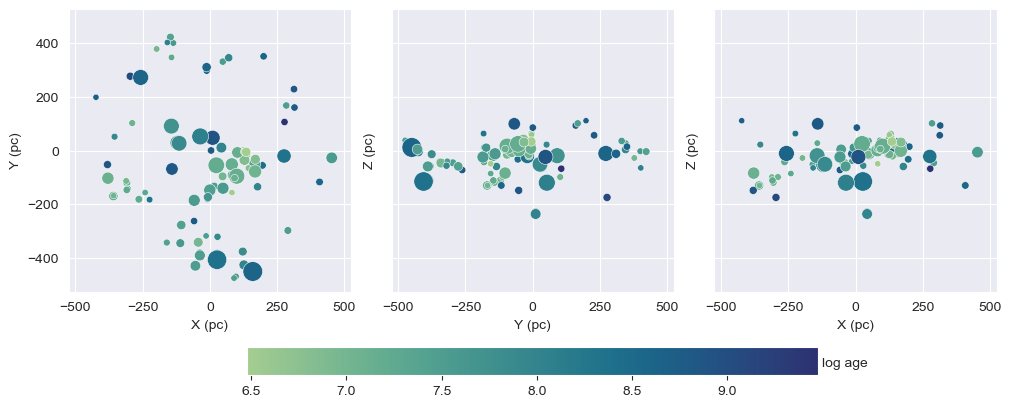

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3, layout="constrained")

sns.set_palette("crest")

norm = plt.Normalize(Archive_df['ref_age'].min(), Archive_df['ref_age'].max())
sm = plt.cm.ScalarMappable(cmap="crest", norm=norm)
sm.set_array([])


xy = sns.scatterplot(
    data=Archive_df, x="x", y="y", size="Nstars", hue = "ref_age", palette = "crest", norm = norm,
    sizes=(20, 200), legend=False, ax = ax[0], #style = "catalog",
).set(xlabel="X (pc)", ylabel="Y (pc)")
ax[0].set_xlim(-525, 525)
ax[0].set_ylim(-525, 525)
ax[0].set_aspect("equal")

yz = sns.scatterplot(
    data=Archive_df, x="y", y="z", size="Nstars", hue="ref_age", ax = ax[1], norm = norm, palette="crest", #style = "catalog",
    sizes=(20, 200), legend=False).set(xlabel="Y (pc)", ylabel="Z (pc)")
ax[1].set_xlim(-525, 525)
ax[1].set_ylim(-525, 525)
ax[1].set_aspect("equal")
ax[1].xaxis.grid(True, "minor", linewidth=.25)
ax[1].yaxis.grid(True, "minor", linewidth=.25)
ax[1].yaxis.set_ticklabels([])
#ax[1].despine(left=True, bottom=True)

xz = sns.scatterplot(
    data=Archive_df, x="x", y="z", size="Nstars", hue = "ref_age", legend = False,
    sizes=(20, 200), ax = ax[2], norm= norm, palette="crest", #style = "catalog",
).set(xlabel="X (pc)", ylabel="Z (pc)")
#xz.ax.scatter(0, 0, marker="*", color="black", s=50, label="barycenter of the sun")
ax[2].set_xlim(-525, 525)
ax[2].set_ylim(-525, 525)
ax[2].xaxis.grid(True, "minor", linewidth=.25)
ax[2].yaxis.grid(True, "minor", linewidth=.25)
ax[2].set_aspect("equal")
#ax[2].spines["left"].set_visible(False)
#ax[2].spines["bottom"].set_visible(False)
#ax[1]._legend.set_title("Star count")
ax[2].yaxis.set_ticklabels([])



# Remove the legend and add a colorbar
#ax[2].get_legend().remove()
c= fig.colorbar(sm, ax=[ax[0],ax[1],ax[2]], location='bottom', fraction = 0.1)
cax = c.ax
cax.text(9.5,0.3,'log age')

#handles, labels = ax[2].get_legend_handles_labels()
#entries_to_skip = 7
#handles = handles[entries_to_skip:]
#labels = labels[entries_to_skip:]
#for h in handles[1:]:
#    sizes = [s / 10 for s in h.get_sizes()]
#    h.set_sizes(sizes)
#labels = labels[:1] + [f'{int(lab)}' for lab in labels[1:]]
#ax[2].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
#ax[2].legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

fig.set_figheight(4)
fig.set_figwidth(10)
sns.set(font_scale=1.2)

plt.show()

fig.savefig(output_path + "XYZ_plot_CGvalues_all.pdf", dpi=600)


# Extinction plots

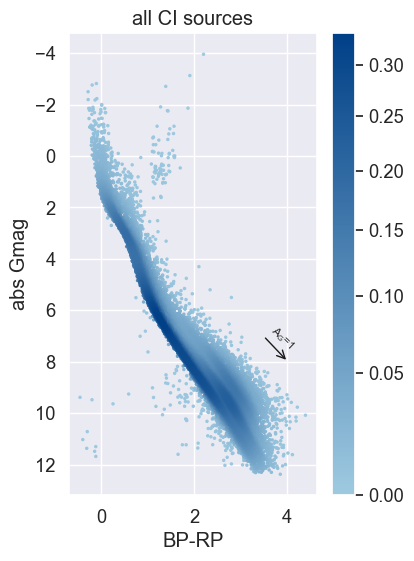

In [12]:
CMD_params = ["Gmag", "BP-RP"]

distance = 1000 / CI_df["plx"].to_numpy()
mag, cax = CI_df[CMD_params[0]].to_numpy(), CI_df[CMD_params[1]].to_numpy()
CMD_specs = dict(axes=CMD_params, filters=[CMD_params[0], CMD_params[1].split("-")[0] + "mag",
                                                CMD_params[1].split("-")[1] + "mag"])

abs_mag = (mag - 5 * np.log10(distance) + 5)

arr = np.stack([cax, abs_mag], axis=1)
cleaned_arr = arr[~np.isnan(arr).any(axis=1), :]
nan_idxes = np.isnan(arr).any(axis=1)
sorted_arr = cleaned_arr[cleaned_arr[:, 1].argsort()]
f = CMD_density_design(sorted_arr, title_axes_specs=["all CI sources", "BP-RP", "abs Gmag"])
#plt.arrow(3.5, 7, 0.5291, 1, head_width=0.05, length_includes_head = True, fc='k', ec='k')
plt.text(3.6,7.5,"A$_{\mathrm{G}}$=1", size = 8, rotation=-44)

plt.annotate("", xy=(4.0291, 8), xytext=(3.5, 7),
            arrowprops=dict(arrowstyle="->", color="k"))
f.savefig(output_path+"CI-extinction_vector.png", dpi = 600)

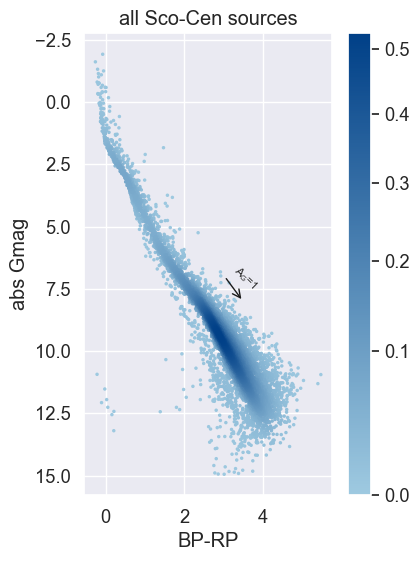

In [13]:
CMD_params = ["Gmag", "BP-RP"]

distance = 1000 / CIII_df["plx"].to_numpy()
mag, cax = CIII_df[CMD_params[0]].to_numpy(), CIII_df[CMD_params[1]].to_numpy()
CMD_specs = dict(axes=CMD_params, filters=[CMD_params[0], CMD_params[1].split("-")[0] + "mag",
                                                CMD_params[1].split("-")[1] + "mag"])

abs_mag = (mag - 5 * np.log10(distance) + 5)

arr = np.stack([cax, abs_mag], axis=1)
cleaned_arr = arr[~np.isnan(arr).any(axis=1), :]
nan_idxes = np.isnan(arr).any(axis=1)
sorted_arr = cleaned_arr[cleaned_arr[:, 1].argsort()]
g = CMD_density_design(sorted_arr, title_axes_specs=["all Sco-Cen sources", "BP-RP", "abs Gmag"])
#plt.arrow(3.5, 7, 0.5291, 1, head_width=0.05, length_includes_head = True, fc='k', ec='k')
plt.text(3.2,7.5,"A$_{\mathrm{G}}$=1", size = 8, rotation=-44)

plt.annotate("", xy=(3.5, 8), xytext=(3.0291, 7),
            arrowprops=dict(arrowstyle="->", color="k"))
g.savefig(output_path+"CIII-extinction_vector_v3.png", dpi = 600)

# Histograms